<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Code Book:</span> Pluto Day!</h1>
<hr>

On August 24th, 2006, the International Astronomical Union (IAU) declared an official definition for the term "planet".

According to their definition, an object in the Solar System needs to meet 3 conditions to be considered a planet.
1. The object must **orbit** the Sun.
2. The object must be massive enough to be **rounded** by its own gravity (a.k.a. it's gotta be a sphere).
3. It must have **cleared the neighborhood** around its orbit.

Pluto's mass is only 0.07 times the mass of the other objects in its orbit (by contrast, Earth's mass is 1.7 *million* times the remaining mass in its orbit).

As a result, Pluto failed to meet the third condition, and it was demoted to a "dwarf planet" (RIP).


<p style="text-align:center; margin: 30px 0 30px 0;">
<img alt="Pluto" style="width: 320px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19); margin-bottom:15px;" src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Pluto_Rotation_Movie.gif">
<em>Forever in our hearts...</em>
</p>


However, Pluto will forever live on in our hearts, and so we present **9 bonus code snippets in honor of the 9 OG planets**.


<br><hr id="toc">


### Table of Contents

1. [How to find sample datasets using Seaborn.](#sample-datasets)
2. [How to customize Seaborn plots further with Matplotlib.](#customize-seaborn)
3. [How to plot charts side-by-side.](#side-by-side)
4. [How to scale size using feature values.](#scale-size)
5. [How to set color using feature values.](#set-color)
6. [How to apply the Box-Cox transformation.](#box-cox)
7. [How to create custom preprocessing steps.](#custom-transformer)
8. [How to sequence preprocessing steps (Naive Bayes example).](#sequence-preprocessing)
9. [How to overlay multiple ROC curves.](#overlay-roc)

<hr>

### First, let's load libraries that we'll need.

In [1]:
#from __future__ import print_function

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

In [35]:
import matplotlib as mpl
mpl.style.use('ggplot')

<br id="sample-datasets">
# 1. How to find sample datasets using Seaborn.

When you want to test a snippet of code or an algorithm, you won't always want to spend time searching for a good dataset. 

You might prefer to just "jump right in" on any reasonable dataset.

### 1.1 - Load dataset
The Seaborn package has several sample datasets that you can easily access, as long as you have internet connection. 
* You can access them through its <code style="color:steelblue">load_dataset()</code> function.
* It looks for online CSV files at https://github.com/mwaskom/seaborn-data.

For example, let's load the **"planets"** dataset like so:

In [2]:
# Load the "planets" sample dataset
df = sns.load_dataset('planets')

This dataset contains 1035 observations and 6 features for each one.

In [3]:
df.shape

(1035, 6)

It contains information about **exoplanets** (planets outside of the solar system) that were discovered between 1989 and 2015.

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [8]:
df.mass.describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

In [9]:
df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [10]:
df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

We'll use this dataset for the rest of this code book.


<p style="text-align:center; margin: 30px 0 30px 0;">
<img alt="Exoplanets discovered throughout the years" style="width: 480px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19); margin-bottom:15px;" src="https://upload.wikimedia.org/wikipedia/commons/4/4c/ExoplanetDiscoveries-Histogram-20160510.jpg">
<em>Number of exoplanets discovered throughout the years.</em>
</p>

### 1.2 - Get dataset names
However, Seaborn has several other datasets. 
* You can also display which ones are available using the <code style="color:steelblue">sns.get_dataset_names()</code> function.
* Each one can be loaded in the same way as the "planets" dataset.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# See sample datasets available
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'planets',
 'tips',
 'titanic']

In [14]:
iris=sns.load_dataset('iris')

In [15]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="customize-seaborn">
# 2. How to customize Seaborn plots further with Matplotlib.

Seaborn is quick, easy, and streamlined, and it's very useful for performing **efficient** exploratory analysis.

However, there will times when you'll need to customize the charts more than what Seaborn allows out-of-the-box.
* For example, you may wish to share your plots or put them in a presentation.
* For these situations, Seaborn can be customized much further by tapping into **Matplotlib**.
* Remember, Seaborn is *built on top of Matplotlib*.


### 2.1 - Limitations of Seaborn
Let's take a look at an example with the planets dataset.

First, for simplicity, let's just drop all the observations with missing values. 
* This typically isn't the best practice, but it's fine for this **toy example**.

In [16]:
# Drop missing data
df = df.dropna()

Next, let's plot the distribution of the <code style="color:steelblue">'mass'</code> feature using the <code style="color:steelblue">sns.distplot()</code> function.

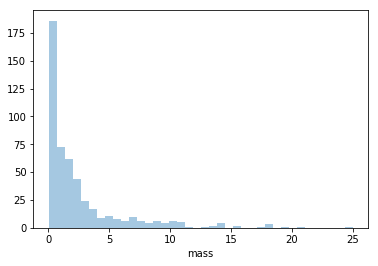

In [17]:
# Distribution of the 'mass' feature
sns.distplot(df.mass, kde=False)

Pretty straightforward, right? But what if we want to start tweaking things such as the axes labels or the title? 
* Well, if you look at the [documentation page](http://seaborn.pydata.org/generated/seaborn.distplot.html), you'll find that those parameters don't exist!
* Instead, Seaborn expects you to directly tweak the underlying Matplotlib object. We'll show you how.


### 2.2 - "Text residue"
But first, let's talk a little more about what we've called **"text residue"** in the past.

Namely, this part of the output: 

<br>
<pre style="color:crimson">
< matplotlib.axes._subplots.AxesSubplot at 0x1101ebbd0 >
</pre>
<br>

You see, what Seaborn is actually doing here is **returning an Axes object** that you can use for further tweaking. 
* In this context "Axes" is not referring to the axes on a single chart. 
* Instead, it's referring to a "set of axes" that Matplotlib treats as a single object.

<p style="text-align:center; margin: 30px 0 30px 0;">
<img alt="Distplot Returns What" style="width: 420px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19); margin-bottom:15px;" src="https://elitedatascience.com/wp-content/uploads/2017/04/distplot-returns-what.png">
What <code style="color:steelblue">sns.displot()</code> returns.
</p>

### 2.3 - Tweaking the Axes

Therefore, tweaking your Seaborn plot is a 2-step process.
1. You need to "capture" the Axes object returned by your plotting function (i.e. set it to a variable).
2. You can then use that object to tweak the plot based on *Matplotlib* functionality.

For example, here's how we'd relabel the axes and give the plot a title.

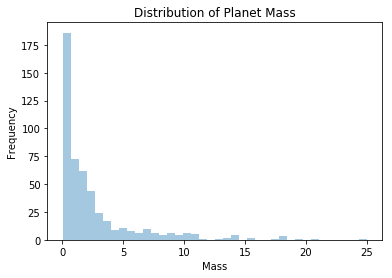

In [19]:
# 1. Capture the Axes object returned by sns.distplot()
ax = sns.distplot(df.mass, kde=False)

# 2. Use the Axes object to tweak the plot
ax.set(xlabel='Mass', 
       ylabel='Frequency',
       title='Distribution of Planet Mass')

# Clear "text residue"
plt.show()

You can read more about Axes and their many options in the [Matplotlib documentation](http://matplotlib.org/api/axes_api.html). 
* Be careful... it's a pretty deep rabbit hole!
* For **basic exploratory analysis**, we still recommend relying primarily on Seaborn's out-of-the-box functionality. It's the best balance between flexibility and ease-of-use.
* However, if you need to create **customized charts for presentations or reports**, just know that Matplotlib allows you to go completely off-road and drive in any direction you need.

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="side-by-side">
# 3. How to plot charts side-by-side.

Next, what if you need to plot charts side-by-side? 
* Again, we don't recommend bothering with this for basic exploratory analysis.
* However, if you ever do need to, it can be difficult to know how to begin.

So we'll show you can example here.

### 3.1 - log(mass)

In the chart from <span style="color:royalblue">2.3</span>, we can see that the <code style="color:steelblue">'mass'</code> feature is heavily *right-skewed*. Most planets have a mass of under 3 (the units are irrelevant here), but a tiny few have up to a mass of 25.

As a result, we may wish to **log-transform** this dataset to create a more "balanced" distribution.
* Maybe you remember the properties of log-transformations, or maybe you don't...
* But with code, you can easily see how they change the data.

Let's start by taking the <code style="color:steelblue">np.log()</code> of <code style="color:steelblue">'mass'</code>.

In [20]:
# Create log(mass)
log_mass = np.log(df.mass)

### 3.2 - Subplots

To create side-by-side plots, we're going to use a Matplotlib concept called **subplots**.
* Subplots work just as they sound... they are individual plots within a larger one.
* You can read more about them in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots).

<br>
Here are the key steps to using subplots:

* First, you must create the overall figure, but you'll use <code style="color:steelblue">plt.subplots()</code> instead of <code style="color:steelblue">plt.plot()</code>.

<pre style="color:#bbb">
fig, (ax1, ax2) = <strong style="color:steelblue">plt.subplots(</strong>ncols=2, sharey=True, figsize=(11,4)<strong style="color:steelblue">)</strong>
</pre>

* You can set the number of columns to include (by the way... setting the number of rows is analogous).

<pre style="color:#bbb">
fig, (ax1, ax2) = plt.subplots(<strong style="color:steelblue">ncols=2</strong>, sharey=True, figsize=(11,4))
</pre>

* The <code style="color:steelblue">sharey=</code> argument tells Matplotlib to share y-axes between the two subplots.

<pre style="color:#bbb">
fig, (ax1, ax2) = plt.subplots(ncols=2, <strong style="color:steelblue">sharey=True</strong>, figsize=(11,4))
</pre>

* Finally, we capture the objects it creates (one Figure, and two Axes).

<pre style="color:#bbb">
<strong style="color:steelblue">fig, (ax1, ax2)</strong> = plt.subplots(ncols=2, sharey=True, figsize=(11,4))
</pre>

* <code style="color:steelblue">ax1</code> refers to the first subplot object and <code style="color:steelblue">ax2</code> refers to the second subplot object.

Now we have a "canvas" that's partitioned into 2 side-by-side subplots. 

### 3.3 - Putting it all together

Now, when you use Seaborn plotting functions, you can pass in an <code style="color:steelblue">ax=</code> argument that tells Seaborn which subplot to use.

Here's the complete example:

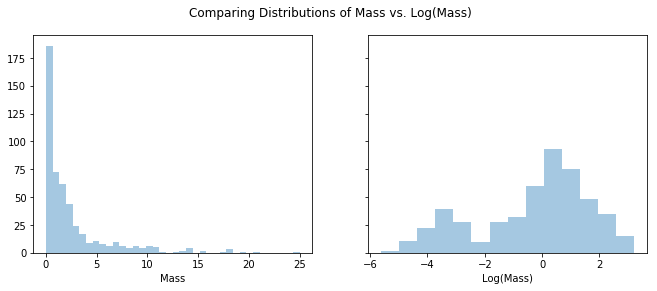

In [24]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(11,4))

# Plot on first subplot
ax1 = sns.distplot(df.mass, ax=ax1, kde=False)
ax1.set(xlabel='Mass')

# Plot on second subplot
ax2 = sns.distplot(log_mass, ax=ax2, kde=False)
ax2.set(xlabel='Log(Mass)')

# Shared title across all subplots
plt.suptitle('Comparing Distributions of Mass vs. Log(Mass)')

# Clear "text residue"
plt.show()

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="scale-size">
# 4. How to scale size using feature values.

We've seen various examples of plots that show information between two features. 


### 4.1 - The third wheel
But what if you wanted to incorporate information from a third feature?
* Well, one option is to make a 3-D plot, but we don't recommend this. It's very easy for the 3-D plot to become cluttered, and it can be very hard to interpret it quickly.
* Instead, as long as it makes sense to do so, we recommend using the **size of points** to represent the third feature.

To illustrate how to do so, let's first take a more manageable subset of our dataset.

In [25]:
# Subset of data
subset = df[df.year >= 2010]
subset.shape

(185, 6)

### 4.2 - Scaling size

The <code style="color:steelblue">plt.scatter()</code> function from Matplotlib has an <code style="color:steelblue">s=</code> argument that scales the size of the points.
* If you pass it an **array with the same length** as those of your data, it will scale each point individually.
* Feel free to multiply the size feature to **accentuate differences**. You can try different scalar values.

Here's the full example:

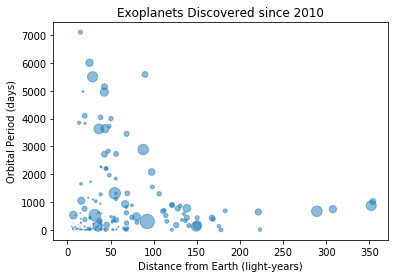

In [26]:
# Scatterplot
plt.scatter(subset.distance,
           subset.orbital_period,
           s=subset.mass*10, # Scale size based on mass (x10 to accentuate differences)
           alpha=0.5)

# Axes labels
plt.title('Exoplanets Discovered since 2010')
plt.ylabel('Orbital Period (days)')
plt.xlabel('Distance from Earth (light-years)')

# Clear "text residue"
plt.show()

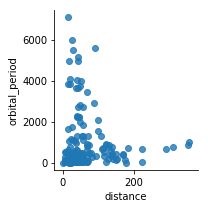

In [30]:
sns.lmplot(data=subset, x="distance",y='orbital_period', fit_reg=False, size=3)

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="set-color">
# 5. How to set color using feature values.

From our experience, when trying to visualize 3 features, changing the color of the points based on the third feature is a very nice **complement** to scaling the size of the points.

### 5.1 - Colormaps
The <code style="color:steelblue">plt.scatter()</code> function also has a <code style="color:steelblue">c=</code> argument that sets the color of the points.
* If you pass it an array with the same length as those of your data, it will set each point individually.
* However, you must then also pass in a <code style="color:steelblue">cmap=</code> argument that determines the **colormap**.

Colormaps simply map numbers to colors. You can find a list of the ones Matplotlib supports [here](http://matplotlib.org/examples/color/colormaps_reference.html).

### 5.2 - Sequential colormaps

Sequential colormaps set the "richness" of a color. 
* Low values will approach white, while high values will be more colorful.
* These are useful for representing **intensity or magnitude** in features.

Here's an example (mass is interpreted as a scale):

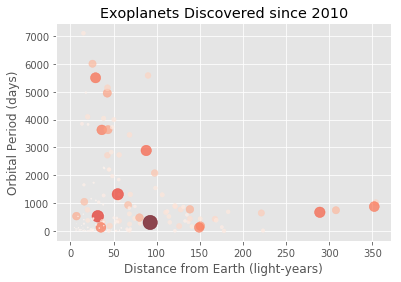

In [37]:
plt.scatter(subset.distance,
            subset.orbital_period,
            s=subset.mass*10,
            c=subset.mass, # Set color based on mass
            cmap='Reds', # Use the 'Reds' sequential colormap
            alpha=0.7
           )

plt.title('Exoplanets Discovered since 2010')
plt.ylabel('Orbital Period (days)')
plt.xlabel('Distance from Earth (light-years)')

plt.show()

In [33]:
subset.mass.dtype

dtype('float64')

### 5.3 - Diverging colormaps

Diverging color maps set the "direction" of color. 
* Low values and high values will be completely different colors.
* These are useful for representing **class or direction** in features.

Here's an example (mass is interpreted as a class, i.e. dense vs. light planets):

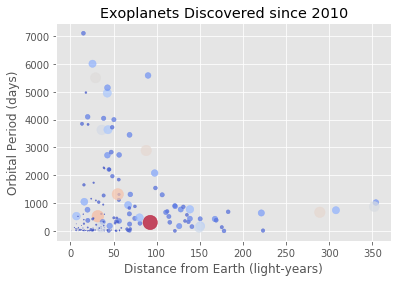

In [39]:
plt.scatter(subset.distance,
            subset.orbital_period,
            s=subset.mass*10,
            c=subset.mass, # Set color based on mass
            cmap='coolwarm', # Use the 'coolwarm' diverging colormap
            alpha=0.7
           )

plt.title('Exoplanets Discovered since 2010')
plt.ylabel('Orbital Period (days)')
plt.xlabel('Distance from Earth (light-years)')
plt.show()

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="box-cox">
# 6. How to apply the Box-Cox transformation.

The Box-Cox transformation is very useful in certain situations.
* It's used to normalize distributions.
* It's actually a **family** of transformations.

### 6.1 - The Box-Cox transformation
We won't go into the math here, but the basic intuition is that the Box-Cox transformation determines a parameter, **$\lambda$ (lambda)**, that corresponds with a type of transformation.
* For example, $\lambda = 0$ corresponds to the natural log transformation, $ln(x)$.
* Different values of $\lambda$ can be determined for each feature.

In practice, Box-Cox often **replace log-transformations** because they automatically determine the "best" transformation for normalizing the data.

**Scipy**, another Python library, comes with an implementation of the <code style="color:steelblue">boxcox()</code> transformation.

In [40]:
from scipy.stats import boxcox

Using it is very simple... Just pass in the data you'd like to transform:

In [41]:
boxcox(df.mass)

(array([ 2.31050489,  0.84668225,  1.03417309,  3.81557945,  2.86717554,
         1.78806731,  1.7443782 ,  2.83897534,  0.72832928, -0.14897891,
         2.77823134,  1.51782211,  1.00233836, -0.58617041,  0.5152479 ,
        -0.70653578, -0.21912297, -1.56070951,  1.40073668, -1.52965495,
        -3.0057392 , -2.28748068, -2.13838913,  1.91716313,  1.28107969,
         0.6169505 , -3.67908901,  0.45433436,  2.40478403,  2.60823643,
         0.64718023,  1.12133567,  0.55432084,  0.03934671,  1.52424181,
         3.9135102 , -0.36331279,  0.72325863,  1.59676616,  0.05759449,
         1.86680073, -2.43265748, -1.01400811, -2.72785977, -1.53841814,
         0.39765214,  0.10525523,  1.52744134, -2.58097083, -2.79249925,
        -2.07757867, -0.19526669,  0.67322219,  0.48852956,  0.89227186,
        -2.945245  , -2.38100355, -2.97474744, -2.83945825, -3.46672482,
        -1.01907703, -2.945245  , -3.1486895 , -3.0057392 , -3.33908729,
        -3.33908729, -3.07292784, -2.58097083,  1.8

In [42]:
# Perform Box-Cox transformation on 'mass'
boxcox_transformed_mass, lmbda = boxcox(df.mass)

The function returns two objects.
* The first is the transformed data, which we've saved as <code style="color:steelblue">boxcox_transformed_mass</code>.
* The second is the $\lambda$ value used, which we've saved as <code style="color:steelblue">lmbda</code>.

In [43]:
# Display lambda used for transformation
lmbda

0.16346104802585196

### 6.2 - Side-by-side-by-side plot

Let's take a look at how the Box-Cox transformed data compares to the log-transformed data and to the original data.
* This time, we're going to create **subplots with 3 columns**.
* The rest of the steps are very similar to the side-by-side plot we made earlier.

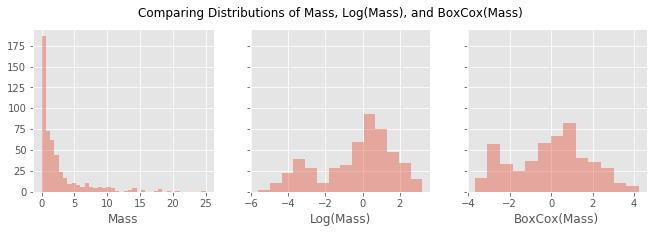

In [46]:
# Create subplots with 3 side-by-side plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(11,3))

# Plot original data on first subplot
ax1 = sns.distplot(df.mass, ax=ax1, kde=False)
ax1.set(xlabel='Mass')

# Plot log-transformed data on second subplot
ax2 = sns.distplot(log_mass, ax=ax2, kde=False)
ax2.set(xlabel='Log(Mass)')

# Plot box-cox transformed data on third subplot
ax3 = sns.distplot(boxcox_transformed_mass, ax=ax3, kde=False)
ax3.set(xlabel='BoxCox(Mass)')

# Shared title across all subplots
plt.suptitle('Comparing Distributions of Mass, Log(Mass), and BoxCox(Mass)')

# Clear "text residue"
plt.show()

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="custom-transformer">
# 7. How to create custom preprocessing steps.

Now, remember, if you wish to perform a transformation during the **modeling workflow**, you should add it to a **model pipeline**, along with the other preprocessing steps, such as <code style="color:steelblue">StandardScaler()</code>.
* That way, you can learn the values of $\lambda$ from the training set and apply the same ones to the test set.
* In other words, $\lambda$ should be treated as a **preprocessing parameter**.
* This also allows you to include transformations inside cross-validation loops.

Unfortunately, Scikit-Learn (as of version 0.18) doesn't have the Box-Cox transformation implemented. 

### 7.1 - Custom transformers

Therefore, we need to create something called a **custom transformer**. Custom transformers allow you to define your own transformations (no matter how obscure or complex) as long as you include key functions that follow the existing paradigm.

First, we'll need to import the <code style="color:steelblue">TransformerMixin</code>.

In [47]:
# Used for custom transformers
from sklearn.base import TransformerMixin

This will allow us to create a **custom Python class** that mimics the functionality of Sckit-Learn classes such as <code style="color:steelblue">StandardScaler()</code>.

### 7.2 - BoxCoxTransformer

Next, there are 3 key functions we must include in the class.
1. First, an <code style="color:steelblue">\__init__()</code> function. We can use this to set the value(s) for $\lambda$, if needed.
2. Second, a <code style="color:steelblue">transform()</code> function. These are instructions for transforming data given the value(s) for $\lambda$.
3. Finally, a <code style="color:steelblue">fit()</code> function. This describes how to "learn" the values of $\lambda$ from a training set.

Here's the full example (note that we use the <code style="color:steelblue">TransformerMixin</code> at the very beginning):

In [48]:
class BoxCoxTransformer(TransformerMixin):
    """
    Custom Box-Cox transformer using the TransformerMixin
    """
    
    def __init__(self, lmbda=None):
        # If lambda values were passed in during initialization, use those
        self.lmbda = lmbda
        
    def transform(self, X, *_):   
        # If given a 1-dimensional X, reshape it to have 2 dimensions
        if len(X.shape) == 1:
            X = X.values.reshape(-1,1)
        
        # Create empty output list
        output = []
        
        # For each feature...
        for i in range(X.shape[1]):
            # Transform that feature's data using its corresponding lambda value
            X_transformed = boxcox(X[:, i], self.lmbda[i])
            
            # Append to output list
            output.append(X_transformed)
        
        # Make output list a Numpy array and transpose it
        output = np.array(output).transpose()
        
        return output
    
    def fit(self, X, *_):
        # If given a 1-dimensional X, reshape it to have 2 dimensions
        if len(X.shape) == 1:
            X = X.values.reshape(-1,1)

        # Create empty lambda list
        self.lmbda = []
        
        # For each feature...
        for i in range(X.shape[1]):
            # Find the best lambda for transforming that feature
            X_transformed, lmbda = boxcox(X[:, i])
            
            # Append that lambda to the lambda list
            self.lmbda.append(lmbda)
            
        return self

In [56]:
class Boxcoxer(TransformerMixin):
    def __int__(self, lmbda=None):
        self.lmbda=lmbda
        
    def fit(self, X):
        if(len(X.shape)==1):
            X=X.reshape(-1,1)
        self.lmbda=[]
        for i in range(X.shape[1]):
            transform, lmbda = boxcox(X[:,i])
            self.lmbda.append(lmbda)
        return self
    
    def transform(self, X):
        if(len(X.shape)==1):
            X=X.reshape(-1,1)
        out=[]
        for i in range(X.shape[1]):
            trans=boxcox(X[:,i], self.lmbda[i])
            out.append(trans)
            
        out=np.array(out).T
        return out
            

### 7.3 - "Fitting" the transformation

Now that we have our custom transformer, we can use it in the same way we'd use something like <code style="color:steelblue">StandardScaler()</code>.
1. Initialize an instance of the transformation.
2. "Fit" that instance (i.e. learn the values of lambda from a training set).
3. Transform new data (or the existing training set)

In [49]:
# Initialize transformation
box_cox = BoxCoxTransformer()

# Learn lambda(s)
box_cox.fit(df.mass)

# Use learned lambda(s) to transform data 
boxcox_transformed_mass_2 = box_cox.transform(df.mass)

In [59]:
bc=Boxcoxer()
bc.fit(df.mass)
mass3=bc.transform(df.mass)
mass3

array([[ 2.31050489],
       [ 0.84668225],
       [ 1.03417309],
       [ 3.81557945],
       [ 2.86717554],
       [ 1.78806731],
       [ 1.7443782 ],
       [ 2.83897534],
       [ 0.72832928],
       [-0.14897891],
       [ 2.77823134],
       [ 1.51782211],
       [ 1.00233836],
       [-0.58617041],
       [ 0.5152479 ],
       [-0.70653578],
       [-0.21912297],
       [-1.56070951],
       [ 1.40073668],
       [-1.52965495],
       [-3.0057392 ],
       [-2.28748068],
       [-2.13838913],
       [ 1.91716313],
       [ 1.28107969],
       [ 0.6169505 ],
       [-3.67908901],
       [ 0.45433436],
       [ 2.40478403],
       [ 2.60823643],
       [ 0.64718023],
       [ 1.12133567],
       [ 0.55432084],
       [ 0.03934671],
       [ 1.52424181],
       [ 3.9135102 ],
       [-0.36331279],
       [ 0.72325863],
       [ 1.59676616],
       [ 0.05759449],
       [ 1.86680073],
       [-2.43265748],
       [-1.01400811],
       [-2.72785977],
       [-1.53841814],
       [ 0

In [60]:
mass3.shape

(498, 1)

In [64]:
boxcox_transformed_mass.shape

(498,)

In [65]:
boxcox_transformed_mass_2.shape

(498, 1)

In [67]:
all(mass3.flatten()==boxcox_transformed_mass)

True

In [73]:
all(mass3.ravel()==mass3.flatten())

True

We've saved the transformed data in <code style="color:steelblue">boxcox_transformed_mass_2</code>.

If we implemented the custom transformer correctly, it should be identical to the transformed data from <span style="color:royalblue">6.1</span>, when we used the <code style="color:steelblue">boxcox()</code> function directly.

In [50]:
# Confirm transformed data is the same as in 6.1
all(boxcox_transformed_mass == boxcox_transformed_mass_2.flatten())

True

Just as a final sanity check, we can confirm that the lambdas learned are identical.

In [51]:
# Display lambda used for transformation
print( box_cox.lmbda )

print( lmbda )

[0.16346104802585196]
0.163461048026


### 7.4 - Multiple features

Finally, here's a quick example of where our custom transformer shines. 
* The <code style="color:steelblue">boxcox()</code> function from Scipy **can only handle 1 feature** at a time.
* Our custom transformer **can handle multiple features**, and it will *learn separate lambdas for each one*.

In [74]:
# Initialize transformation
box_cox = BoxCoxTransformer()

# Learn lambda(s)
box_cox.fit(df[['mass', 'orbital_period', 'distance']].values)

# Use learned lambda(s) to transform data 
boxcox_transformed_features = box_cox.transform(df[['mass', 'orbital_period', 'distance']].values)

It should've learned 3 different $\lambda$ values:

In [75]:
# Display lambdas used for transformations
print( box_cox.lmbda )

[0.16346104802585196, 0.13157278843112405, 0.11639582569488408]


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="sequence-preprocessing">
# 8. How to sequence preprocessing steps (Naive Bayes example).

So far, we've seen how to apply the Box-Cox transformation and how to create custom transformers to use in model pipelines.

### 8.1 - Naive Bayes
Now, let's put it all together using the *Naive Bayes* algorithm as an example.

The Naive Bayes algorithm is a very simple algorithm for **classification**. We won't go into the theory behind it here, but the basic intuition is that it generates **probability distributions** for different classes based on your training data and categorizes new observations based on those distributions.
* There are no hyperparameters to tune.
* One of the assumptions for *Gaussian Naive Bayes* is that your features are **normally distributed**.
* Therefore, applying the **Box-Cox transformation before Naive Bayes** tends to improve performance.
* There's a great read [here](http://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification) that further breaks down the intuition behind Naive Bayes.

Let's import the tools we'll need:

In [78]:
# Splitting data and making model pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Min-Max scaler (slightly different than StandardScaler!)
from sklearn.preprocessing import MinMaxScaler

### 8.2 - Toy example: binary classification

Toy examples excellent ways to save time and learn concepts by simplifying the problem.
* They help you isolate and break down the trickiest part of the problem. 
* Since our purpose is to see the entire model pipeline (with sequential preprocessing steps) in action, let's just create a **simple, contrived** problem for our dataset.

First, display the distribution of exoplanets by discovery year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

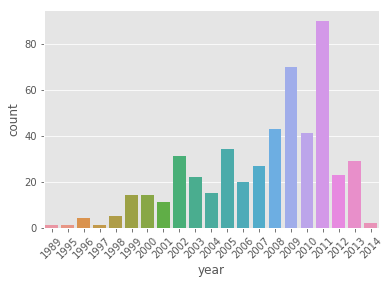

In [79]:
# Distribution of exoplanets by discovery year
sns.countplot(df.year)
plt.xticks(rotation=45)

From a eyeball test, it looks like about half were discovered after 2006 and half before.

For simplicity, let's try to build a model that predicts if an exoplanet was discovered after 2006 based on features such as mass, orbital period, and distance from Earth.

Let's create our training and test sets:

In [80]:
# Create target variable
y = (df.year > 2006).astype(int)

# Create input features
X = df.drop(['year', 'number', 'method'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

### 8.3 - MinMaxScaler

When using a Box-Cox transformation, you usually need to include another preprocessing step before it.
* One of the requirements for the Box-Cox transformation is that your data **must be positive**.
* You'll get an error if you try to apply to features with negative values.

<pre style="color:crimson">
ValueError: Data must be positive.
</pre>

(Feel free to try it on your own)

<br>
Therefore, we should scale our data beforehand. 
* However, <code style="color:steelblue">StandardScaler</code> doesn't solve the problem because it scales features to make them centered around 0, which means you'll still have negative values.
* That's where <code style="color:steelblue">MinMaxScaler</code> comes in. With this transformer, you can scale each feature to a designated **feature range**.

Here's how we'd create the entire model pipeline:

In [81]:
nb_pipeline = make_pipeline(MinMaxScaler(feature_range=(1, 2)), # Scale features to (1,2)
                            BoxCoxTransformer(), # Apply Box-Cox transformation
                            GaussianNB()) # Fit a Naive Bayes model

### 8.4 - Fitting the model

After setting up the pipeline correctly, fitting the model is as easy as one line of code:

In [82]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(1, 2))), ('boxcoxtransformer', <__main__.BoxCoxTransformer object at 0x000000000B8C5CC0>), ('gaussiannb', GaussianNB(priors=None))])

In [83]:
a=nb_pipeline.fit(X_train, y_train)
a

Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(1, 2))), ('boxcoxtransformer', <__main__.BoxCoxTransformer object at 0x000000000B8C5CC0>), ('gaussiannb', GaussianNB(priors=None))])

Predicting new data is also one line of code:

In [85]:
nb_pipeline.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

#### Remember, for classification, <code style="color:steelblue">predict_proba</code> is often more useful:

In [86]:
# Predict class probabilities
pred = nb_pipeline.predict_proba(X_test)

In [89]:
pred[:5]

array([[ 0.26153029,  0.73846971],
       [ 0.47555274,  0.52444726],
       [ 0.28354243,  0.71645757],
       [ 0.32966356,  0.67033644],
       [ 0.43241396,  0.56758604]])

In [90]:
# Keep the positive class probabilities
pred = [p[1] for p in pred]

pred[:10]

[0.7384697075101665,
 0.52444725803615988,
 0.71645756764855895,
 0.67033644075148524,
 0.56758604434289106,
 0.64877894959507076,
 0.58881172892759659,
 0.67427775413087465,
 0.59822090535377825,
 0.5398659437386738]

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="overlay-roc">
# 9. How to overlay multiple ROC curves.

One popular visualization in textbooks and technical presentations is a plot showing overlaid ROC curves for classification performance.

We'll round out this code book with a recipe for creating these plots.

### 9.1 - Random forest classifier

In <span style="color:royalblue">8.4</span>, we already trained a Naive Bayes model for our toy problem. Now, let's quickly train a random forest classifier and compare results.

In [92]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# StandardScaler
from sklearn.preprocessing import StandardScaler

# For calculating AUROC
from sklearn.metrics import roc_curve, auc

For random forests, we typically don't need to perform Box-Cox transformations.

In [93]:
# Random forest pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))

# Fit random forest
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False))])

### 9.2 - Overlaid ROC curves

Here's the full example.
* If you have more models, you can also put this process in a loop.

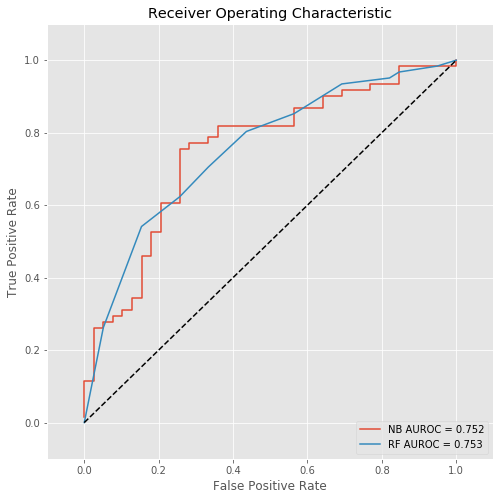

In [94]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


# ---- Naive Bayes ---- #

# Predicts X_test using model
pred = nb_pipeline.predict_proba(X_test)
pred = [p[1] for p in pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('NB', auroc))


# ---- Random Forest ---- #

# Predicts X_test using model
pred = rf_pipeline.predict_proba(X_test)
pred = [p[1] for p in pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))


# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
prob=rf_pipeline.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])
auc2=auc(fpr, tpr)
auc2

0.75304749894913836

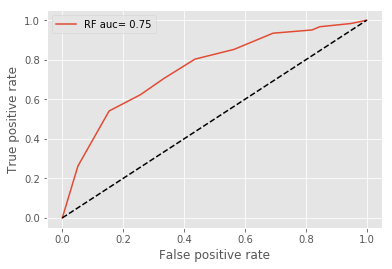

In [99]:
plt.plot(fpr, tpr, label="RF auc= %.2f"%auc2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([0,1],[0,1],'k--')
plt.legend()


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>